In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

data = pd.read_csv('AMZN.csv')

data = data[['Date','Close']]
data

SyntaxError: expected 'else' after 'if' expression (3353314281.py, line 12)

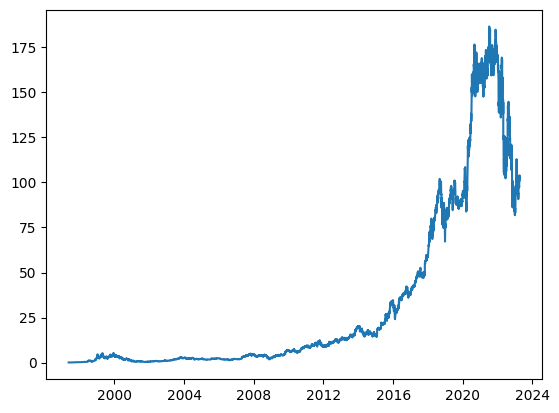

In [4]:
data['Date']=pd.to_datetime(data['Date'])
plt.plot(data['Date'],data['Close'])

In [5]:
from copy import deepcopy as dc

def prepare_dataframe(df,n_steps):
  df = dc(df)

  df.set_index('Date',inplace=True)
  for i in range(1, n_steps+1):
    df[f'Close(t-{i})']=df['Close'].shift(i)
  df.dropna(inplace=True)
  return df

lookback = 7
shifted_df = prepare_dataframe(data, lookback)
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
1997-05-27,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458,0.097917
1997-05-28,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458
1997-05-29,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417
1997-05-30,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771
1997-06-02,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354
...,...,...,...,...,...,...,...,...
2023-03-30,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997,100.610001
2023-03-31,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997
2023-04-03,102.410004,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999


In [49]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [50]:
shifted_df_as_np = shifted_df.to_numpy()
shifted_df_as_np

array([[7.91670000e-02, 7.50000000e-02, 6.97920000e-02, ...,
        8.54170000e-02, 8.64580000e-02, 9.79170000e-02],
       [7.65630000e-02, 7.91670000e-02, 7.50000000e-02, ...,
        8.17710000e-02, 8.54170000e-02, 8.64580000e-02],
       [7.52600000e-02, 7.65630000e-02, 7.91670000e-02, ...,
        7.13540000e-02, 8.17710000e-02, 8.54170000e-02],
       ...,
       [1.02410004e+02, 1.03290001e+02, 1.02000000e+02, ...,
        9.80400010e+01, 9.81299970e+01, 9.87099990e+01],
       [1.03949997e+02, 1.02410004e+02, 1.03290001e+02, ...,
        9.72399980e+01, 9.80400010e+01, 9.81299970e+01],
       [1.01099998e+02, 1.03949997e+02, 1.02410004e+02, ...,
        1.00250000e+02, 9.72399980e+01, 9.80400010e+01]], shape=(6509, 8))

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)
shifted_df_as_np

array([[-0.99991063, -0.99995531, -1.        , ..., -0.99983244,
        -0.99982128, -0.99969839],
       [-0.99993855, -0.99991063, -0.99994415, ..., -0.99987154,
        -0.99983244, -0.99982128],
       [-0.99995253, -0.99993855, -0.99989946, ..., -0.99998325,
        -0.99987154, -0.99983244],
       ...,
       [ 0.09747299,  0.10690997,  0.09308121, ...,  0.0506149 ,
         0.05158   ,  0.05779984],
       [ 0.11398769,  0.09747299,  0.10691495, ...,  0.04203581,
         0.0506149 ,  0.05158   ],
       [ 0.08342464,  0.11398769,  0.09747802, ...,  0.07431453,
         0.04203581,  0.0506149 ]], shape=(6509, 8))

In [10]:
X = shifted_df_as_np[:,1:]
y = shifted_df_as_np[:,0]

X.shape, y.shape

((6509, 7), (6509,))

In [12]:
X = dc(np.flip(X, axis = 1))
X


array([[-0.99995531, -1.        , -0.99998325, ..., -0.99983244,
        -0.99982128, -0.99969839],
       [-0.99991063, -0.99994415, -1.        , ..., -0.99987154,
        -0.99983244, -0.99982128],
       [-0.99993855, -0.99989946, -0.99994415, ..., -0.99998325,
        -0.99987154, -0.99983244],
       ...,
       [ 0.10690997,  0.09308121,  0.07431453, ...,  0.0506149 ,
         0.05158   ,  0.05779984],
       [ 0.09747299,  0.10691495,  0.09308121, ...,  0.04203581,
         0.0506149 ,  0.05158   ],
       [ 0.11398769,  0.09747802,  0.10691495, ...,  0.07431453,
         0.04203581,  0.0506149 ]], shape=(6509, 7))

In [13]:
split_index = int(len(X)*0.95)
split_index

6183

In [51]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6183, 7), (326, 7), (6183,), (326,))

In [52]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_test = y_test.reshape((-1, 1))
y_train = y_train.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((6183, 7, 1), (326, 7, 1), (6183, 1), (326, 1))

In [53]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([6183, 7, 1]),
 torch.Size([326, 7, 1]),
 torch.Size([6183, 1]),
 torch.Size([326, 1]))

In [54]:
from torch.utils.data import Dataset

class TimeSeries(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y
  def __len__(self):
    return len(self.X)
  def __getitem__(self, i):
    return self.X[i], self.y[i]

train_dataset = TimeSeries(X_train, y_train)
test_dataset = TimeSeries(X_test, y_test)

In [55]:
train_dataset

In [56]:
from torch.utils.data import DataLoader
batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [57]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [58]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out
model = LSTM(1,4,1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [59]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch_index % 100 == 99:
            avg_loss_across_batches = running_loss/ 100
            print('Batch: {0}, Loss: {1:.3f}'.format(batch_index+1, avg_loss_across_batches))
            running_loss = 0.0
    print()

In [60]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()
            
            
    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val loss: {0:.3f}'.format(avg_loss_across_batches))
    print('****************************************************************')
    print()
        

In [64]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch: 100, Loss: 0.000
Batch: 200, Loss: 0.000
Batch: 300, Loss: 0.000

Val loss: 0.006
****************************************************************

Epoch: 2
Batch: 100, Loss: 0.000
Batch: 200, Loss: 0.000
Batch: 300, Loss: 0.000

Val loss: 0.006
****************************************************************

Epoch: 3
Batch: 100, Loss: 0.000
Batch: 200, Loss: 0.000
Batch: 300, Loss: 0.000

Val loss: 0.005
****************************************************************

Epoch: 4
Batch: 100, Loss: 0.000
Batch: 200, Loss: 0.000
Batch: 300, Loss: 0.000

Val loss: 0.005
****************************************************************

Epoch: 5
Batch: 100, Loss: 0.000
Batch: 200, Loss: 0.000
Batch: 300, Loss: 0.000

Val loss: 0.005
****************************************************************

Epoch: 6
Batch: 100, Loss: 0.000
Batch: 200, Loss: 0.000
Batch: 300, Loss: 0.000

Val loss: 0.005
****************************************************************

Epoch: 7
Batch: 

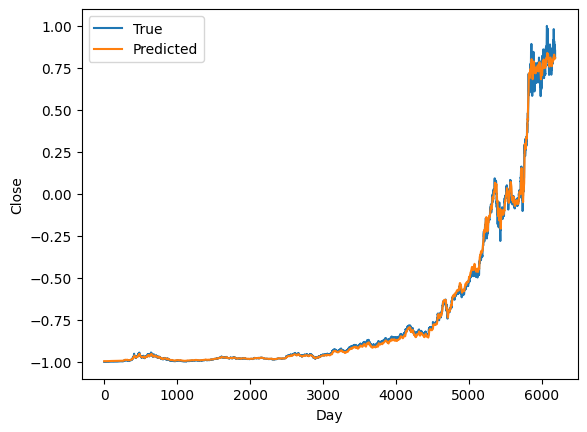

In [62]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()
    
plt.plot(y_train, label='True')
plt.plot(predicted, label='Predicted')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [66]:
train_predictions = predicted.flatten()


dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:,0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:,0])
train_predictions

array([  0.49318366,   0.49097152,   0.48999329, ..., 168.38664057,
       168.66676997, 168.81282077], shape=(6183,))

In [67]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:,0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:,0])
new_y_train

/var/folders/d7/80fz355j2730tx2lwyv6vf1w0000gn/T/ipykernel_31860/1256457756.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  dummies[:,0] = y_train.flatten()


array([7.91646265e-02, 7.65634249e-02, 7.52572660e-02, ...,
       1.69091505e+02, 1.73315001e+02, 1.68871003e+02], shape=(6183,))

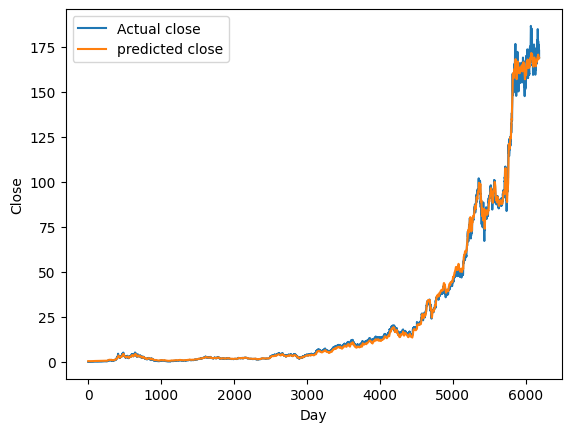

In [70]:
plt.plot(new_y_train, label='Actual close')
plt.plot(train_predictions, label='predicted close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [71]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()
dummiies = np.zeros((X_test.shape[0], lookback+1))
dummiies[:,0] = test_predictions
dummiies = scaler.inverse_transform(dummiies)

test_predictions = dc(dummiies[:,0])
test_predictions

array([171.99297315, 171.46998156, 170.46565651, 170.67373041,
       171.08731034, 171.07307599, 170.99930302, 171.15238485,
       171.16163357, 170.84407576, 170.00767273, 170.19220797,
       169.72917741, 168.50416153, 167.30906502, 166.21570439,
       165.20403706, 165.04063936, 164.91379743, 164.11253841,
       163.82831267, 162.93298241, 161.72535234, 159.5611137 ,
       155.99777876, 153.71158378, 151.03798207, 148.61243383,
       146.73720091, 145.99641427, 146.74035793, 148.01137284,
       149.11025268, 148.3552817 , 151.04682504, 153.27102471,
       155.43558016, 157.02013436, 157.98340155, 158.39258502,
       158.67757778, 158.51633663, 158.46621903, 157.59542789,
       156.57444514, 155.64082498, 153.99306936, 153.63956718,
       153.58485302, 153.55080395, 153.27105806, 153.392164  ,
       153.12002162, 152.43931829, 150.12286489, 147.82616506,
       146.40956623, 146.41130592, 146.20780636, 145.6415559 ,
       146.49859069, 148.75610575, 151.42518871, 154.03

In [72]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:,0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:,0])
new_y_test

/var/folders/d7/80fz355j2730tx2lwyv6vf1w0000gn/T/ipykernel_31860/3738545629.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  dummies[:,0] = y_test.flatten()


array([170.01749949, 167.07899763, 170.41700626, 171.03700377,
       171.0684961 , 169.66949429, 170.66099675, 169.20100565,
       168.64449858, 166.71699707, 170.40449492, 167.52200227,
       164.35699578, 163.25399737, 162.55400179, 161.48599177,
       165.36199892, 165.20699954, 161.21400501, 162.13799851,
       158.91749416, 156.29899568, 151.66749509, 142.64300408,
       144.54400445, 139.98599336, 138.87249844, 139.63749627,
       143.97799855, 149.57350001, 151.19349835, 150.61250219,
       138.84550541, 157.63949825, 157.93550165, 161.41349717,
       161.18949925, 159.003495  , 153.29350176, 155.1670061 ,
       156.51049894, 158.10049453, 154.6524962 , 152.60149876,
       150.19749381, 144.82699629, 151.35800212, 153.78849709,
       153.56300403, 151.14199678, 152.05250627, 147.89849848,
       145.64100565, 137.45300383, 136.01449488, 139.27900567,
       146.81750468, 145.52450739, 141.8529947 , 147.36650272,
       153.10400311, 157.23899657, 161.25050521, 161.49

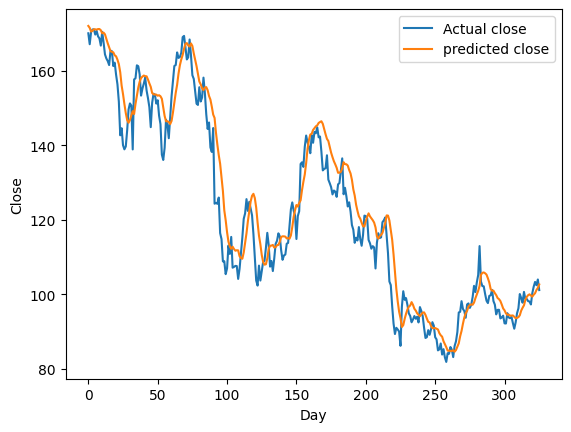

In [73]:
plt.plot(new_y_test, label='Actual close')
plt.plot(test_predictions, label='predicted close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()